In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('ScreenTime vs MentalWellness.csv')
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [3]:
df.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,0.0
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750,NaN
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793,NaN
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000,NaN
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000,NaN
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000,NaN
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000,NaN
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [19]:
df = df.drop('Unnamed: 15', axis=1)
df['exercise_hours_per_week'] = df['exercise_minutes_per_week'] / 60
df = df.drop('exercise_minutes_per_week', axis=1)
df.loc[df['occupation'].isin(['Retired', 'Unemployed']), 'work_mode'] = pd.NA

In [20]:
df['age_group'] = pd.qcut(df['age'], q=4, labels=['Younger', 'Young', 'Old', 'Older'])

In [ ]:
df['gender'] = df['gender'].astype('category')
df["mental_wellness_index_0_100"] = df.pop("mental_wellness_index_0_100")

In [23]:
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,social_hours_per_week,exercise_hours_per_week,age_group,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,0.7,2.116667,Old,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,2.1,1.233333,Young,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,8.0,1.116667,Old,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,5.7,0.000000,Older,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,10.1,2.383333,Young,0.0


In [ ]:
df[['work_mode', 'occupation']].drop_duplicates().sort_values(by=['work_mode'])

In [ ]:
df.loc[df['occupation'].isin(['Retired', 'Unemployed']), 'work_mode'] = pd.NA

In [ ]:
df.head()

In [ ]:
df[df["occupation"] == "Unemployed"]

In [ ]:
df['gender'].unique()

In [16]:
df = df.select_dtypes(exclude=['object'])
df.corr()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
age,1.000000,0.069340,0.074443,0.013039,0.053503,-0.017816,0.046246,-0.088678,0.040912,0.024754,-0.051935,NaN
screen_time_hours,0.069340,1.000000,0.519950,0.669490,-0.331314,-0.278365,0.697812,-0.706537,-0.171653,-0.198124,-0.635943,NaN
work_screen_hours,0.074443,0.519950,1.000000,-0.286414,-0.133243,-0.100854,0.307424,-0.335697,-0.078305,-0.051876,-0.286261,NaN
leisure_screen_hours,0.013039,0.669490,-0.286414,1.000000,-0.255747,-0.224523,0.515358,-0.500558,-0.124439,-0.177113,-0.464366,NaN
sleep_hours,0.053503,-0.331314,-0.133243,-0.255747,1.000000,0.614381,-0.481137,0.517313,0.188538,0.023130,0.580824,NaN
sleep_quality_1_5,-0.017816,-0.278365,-0.100854,-0.224523,0.614381,1.000000,-0.558870,0.644802,0.095391,0.017767,0.750092,NaN
stress_level_0_10,0.046246,0.697812,0.307424,0.515358,-0.481137,-0.558870,1.000000,-0.879539,-0.159670,-0.114268,-0.913818,NaN
productivity_0_100,-0.088678,-0.706537,-0.335697,-0.500558,0.517313,0.644802,-0.879539,1.000000,0.131879,0.117232,0.902249,NaN
exercise_minutes_per_week,0.040912,-0.171653,-0.078305,-0.124439,0.188538,0.095391,-0.159670,0.131879,1.000000,0.019231,0.228592,NaN
social_hours_per_week,0.024754,-0.198124,-0.051876,-0.177113,0.023130,0.017767,-0.114268,0.117232,0.019231,1.000000,0.070400,NaN


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
age = df['age']

<Axes: xlabel='occupation', ylabel='Count'>

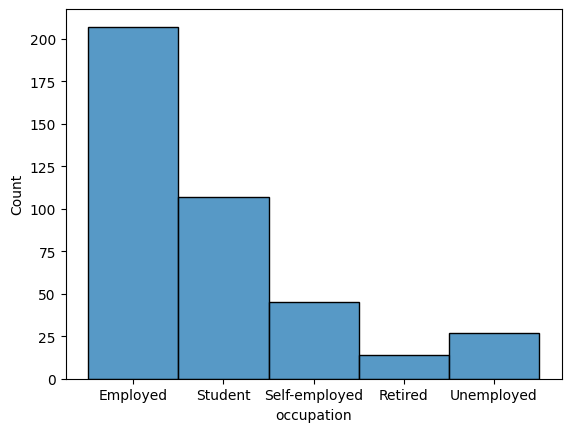

In [8]:
occupation = df['occupation']
sns.histplot(occupation)

In [10]:
df["occupation"].value_counts(normalize=True)

occupation
Employed         0.5175
Student          0.2675
Self-employed    0.1125
Unemployed       0.0675
Retired          0.0350
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

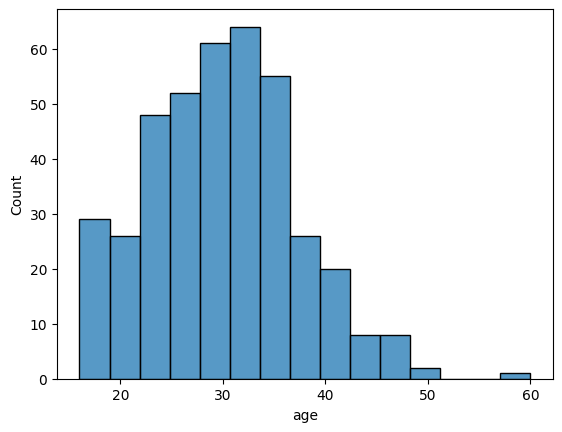

In [7]:
sns.histplot(age)

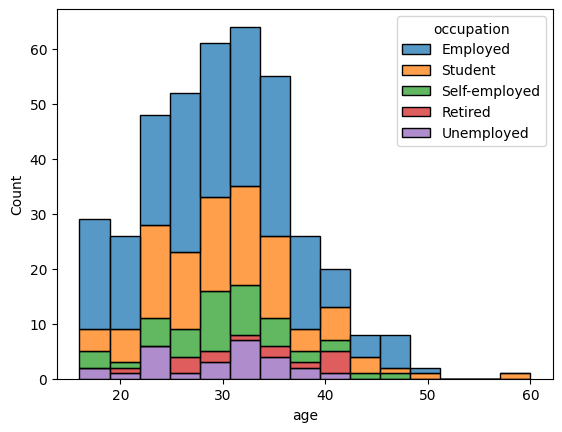

In [14]:
sns.histplot(data=df, x="age", hue="occupation", multiple="stack")  # or "dodge" / "layer"
plt.show()

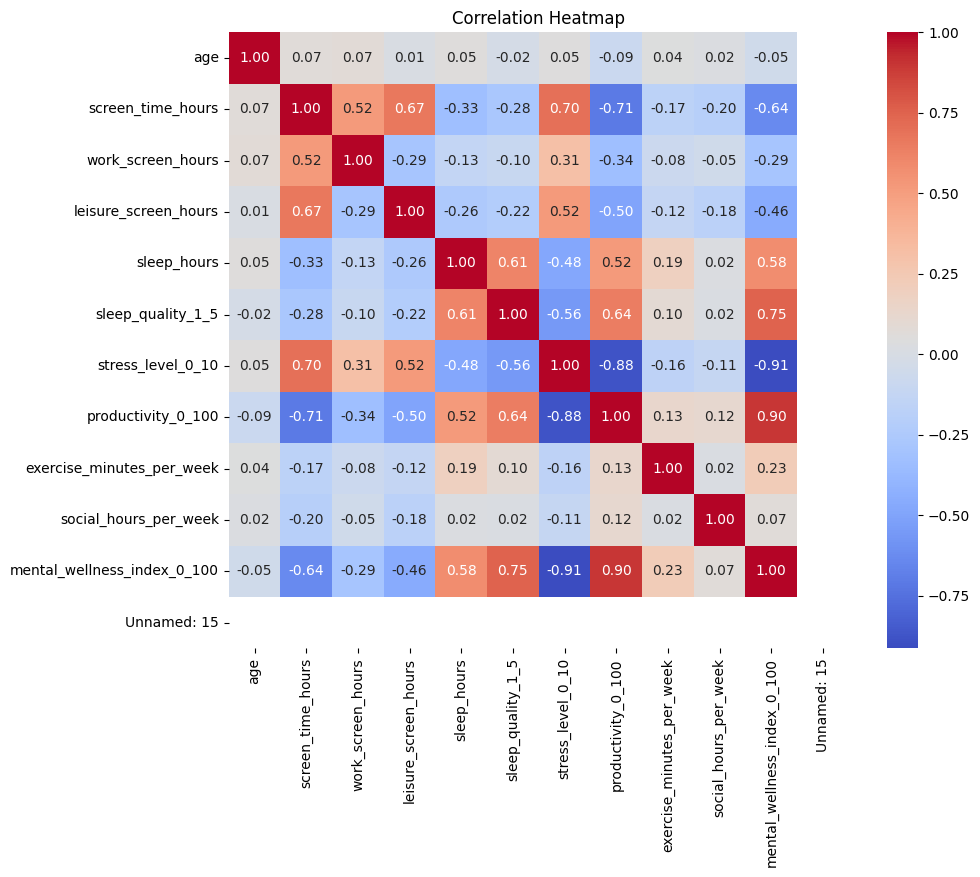

In [17]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()